# **Outlier**

---



정답이 있는 것 X

목적에 맞는 이상치 제거에 대한 방법 생각해야함

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# 각반의 수학 점수
t_math1 = [40,30,20,45,63,69,25,31,12,14,100]
t_math2 = [11,13,14,21,22,25,10,9,12,7,100]

In [3]:
df_sp = pd.DataFrame({'scoring_1':t_math1,
                     'scoring_2':t_math2})

<Axes: ylabel='scoring_1'>

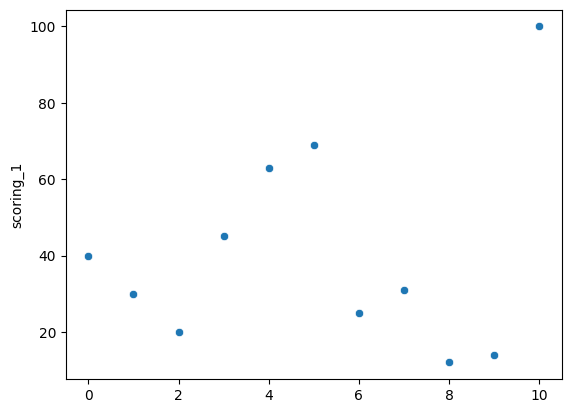

In [5]:
sns.scatterplot(df_sp.scoring_1)

<Axes: ylabel='scoring_2'>

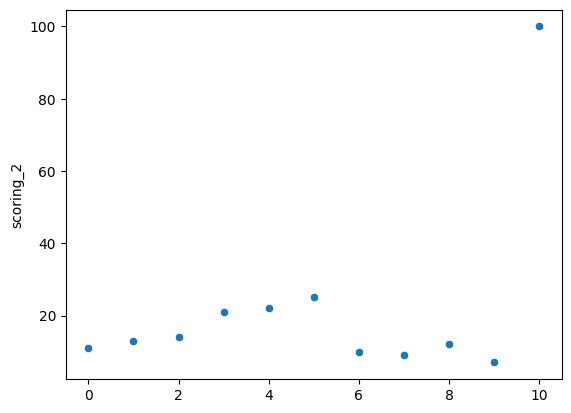

In [6]:
sns.scatterplot(df_sp.scoring_2)

## Outlier 확인하기

In [73]:
from sklearn import datasets

dataset = datasets.fetch_california_housing()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target

In [74]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<Axes: >

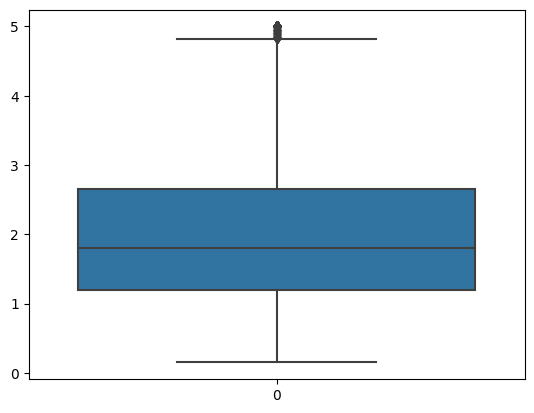

In [75]:
sns.boxplot(df.target)

In [76]:
df.target.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: target, dtype: float64

<Axes: >

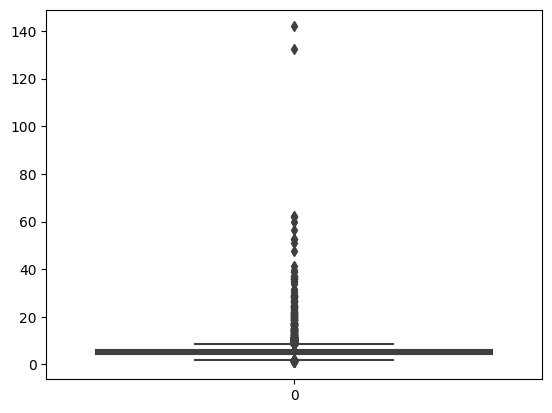

In [77]:
sns.boxplot(df.AveRooms)

In [78]:
df.AveRooms.describe()

count    20640.000000
mean         5.429000
std          2.474173
min          0.846154
25%          4.440716
50%          5.229129
75%          6.052381
max        141.909091
Name: AveRooms, dtype: float64

In [79]:
# 최대값의 index 추출
np.argmax(df['AveRooms'])

1914

In [80]:
df.iloc[1914]

MedInc          1.875000
HouseAge       33.000000
AveRooms      141.909091
AveBedrms      25.636364
Population     30.000000
AveOccup        2.727273
Latitude       38.910000
Longitude    -120.100000
target          5.000010
Name: 1914, dtype: float64

## 이상치 제거하지 않고 RMSE 정도 낮추기 가능?

## 가중치 등 새로운 변수 만들면 정말 성능 좋아지는가?

In [15]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [81]:
df_sp = df[['AveBedrms','HouseAge','Population','target']]

In [23]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(df_sp.drop('target',axis=1),df_sp['target'], test_size=0.3, random_state=111)

### 베이스

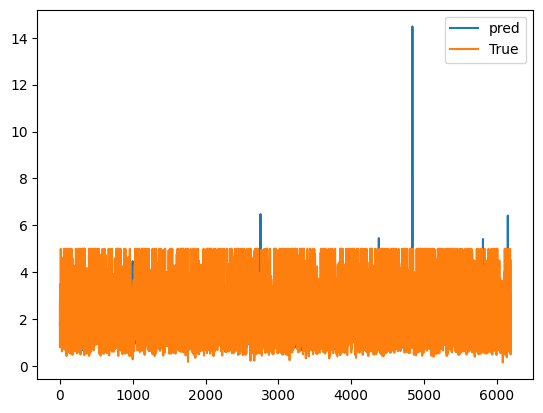

In [83]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fit_train1 = sm.OLS(y_train, X_train)
fit_train1 = fit_train1.fit()

# 예측값
plt.plot(np.array(fit_train1.predict(X_test)), label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend() # 범례
plt.show()

In [84]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_true=y_test, y_pred=fit_train1.predict(X_test))
print(mse1)

1.5147835306070903


베이스라인 모델로 회귀분석 진행 시 1.5


## AveBedrms 이상치 제거

*   IQR 제거
*   통계치에 대한 개념으로 제거



In [85]:
Q1 = df_sp['AveBedrms'].quantile(0.25) # 제1사분위
Q3 = df_sp['AveBedrms'].quantile(0.75) # 제3사분위
IQR = Q3 - Q1
rev_range = 3
filter1 = (df_sp['AveBedrms'] >= Q1 - rev_range*IQR) & (df_sp['AveBedrms'] <= Q3 + rev_range*IQR)

In [86]:
df_sp_rmv = df_sp.loc[filter1]

In [87]:
df_sp_rmv

,AveBedrms,HouseAge,Population,target
0,1.023810,41.0,322.0,4.526
1,0.971880,21.0,2401.0,3.585
2,1.073446,52.0,496.0,3.521
3,1.073059,52.0,558.0,3.413
4,1.081081,52.0,565.0,3.422
...,...,...,...,...
20635,1.133333,25.0,845.0,0.781
20636,1.315789,18.0,356.0,0.771
20637,1.120092,17.0,1007.0,0.923
20638,1.171920,18.0,741.0,0.847


## 이상치 제거

In [88]:
def replace_outlier(value):
    Q1 = df_sp['AveBedrms'].quantile(0.25)
    Q3 = df_sp['AveBedrms'].quantile(0.75)
    IQR = Q3 - Q1
    rev_range = 3

    if((value < (Q1-rev_range*IQR))): # Q1 아래 fence보다 작으면
        value = np.nan
    if((value > (Q3+rev_range*IQR))): # Q3 위 fence보다 크면
        value = np.nan
    return value

df_sp['AveBedrms'] = df_sp['AveBedrms'].apply(replace_outlier)

<ipython-input-88-2e3a78a32480>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['AveBedrms'] = df_sp['AveBedrms'].apply(replace_outlier)


In [89]:
df_sp.isna().sum()

AveBedrms     724
HouseAge        0
Population      0
target          0
dtype: int64

In [90]:
# 이상치를 제거하고 분석
df_sp2 = df_sp.dropna()

In [91]:
df_sp2

,AveBedrms,HouseAge,Population,target
0,1.023810,41.0,322.0,4.526
1,0.971880,21.0,2401.0,3.585
2,1.073446,52.0,496.0,3.521
3,1.073059,52.0,558.0,3.413
4,1.081081,52.0,565.0,3.422
...,...,...,...,...
20635,1.133333,25.0,845.0,0.781
20636,1.315789,18.0,356.0,0.771
20637,1.120092,17.0,1007.0,0.923
20638,1.171920,18.0,741.0,0.847


In [92]:
X_train, X_test, y_train, y_test = train_test_split(df_sp2.drop('target', axis=1), df_sp2['target'], test_size=0.3, random_state=111)

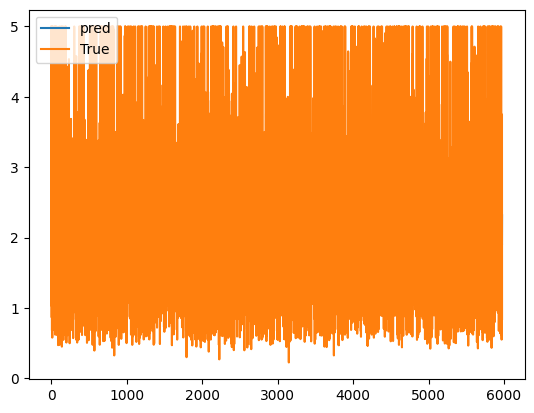

In [93]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fit_train2 = sm.OLS(y_train, X_train)
fit_train2 = fit_train2.fit()

# 예측값
plt.plot(np.array(fit_train2.predict(X_test)), label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [94]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_true = y_test, y_pred = fit_train2.predict(X_test))
print(mse2)

1.3731187873235062


In [95]:
print(mse1)
print(mse2)

1.5147835306070903
1.3731187873235062


## 이상치 살려서 분석

*   이상치 가중치 1, 이상치 아닌 경우 0
*   이상치 아닌 경우 1, 이상치 0

*   이상치에 가중치 좀 더 두면 어떻게 진행?





In [101]:
df_sp = df[['AveBedrms','HouseAge','Population','target']]

In [102]:
def saving_outlier(value):
    Q1 = df_sp['AveBedrms'].quantile(0.25)
    Q3 = df_sp['AveBedrms'].quantile(0.75)
    IQR = Q3 - Q1
    rev_range = 3

    if((value < (Q1 - rev_range*IQR))):
        value = 1
    elif((value > (Q3 + rev_range*IQR))):
        value = 1
    else:
        value = 0
    return value

df_sp['AveBedrms_sv'] = df_sp['AveBedrms'].apply(saving_outlier)

<ipython-input-102-1a63cf452769>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['AveBedrms_sv'] = df_sp['AveBedrms'].apply(saving_outlier)


In [103]:
df_sp.AveBedrms_sv.sum()

724

In [104]:
df_sp

,AveBedrms,HouseAge,Population,target,AveBedrms_sv
0,1.023810,41.0,322.0,4.526,0
1,0.971880,21.0,2401.0,3.585,0
2,1.073446,52.0,496.0,3.521,0
3,1.073059,52.0,558.0,3.413,0
4,1.081081,52.0,565.0,3.422,0
...,...,...,...,...,...
20635,1.133333,25.0,845.0,0.781,0
20636,1.315789,18.0,356.0,0.771,0
20637,1.120092,17.0,1007.0,0.923,0
20638,1.171920,18.0,741.0,0.847,0


In [105]:
X_train, X_test, y_train, y_test = train_test_split(df_sp.drop('target', axis=1), df_sp['target'], test_size=0.3, random_state=111)

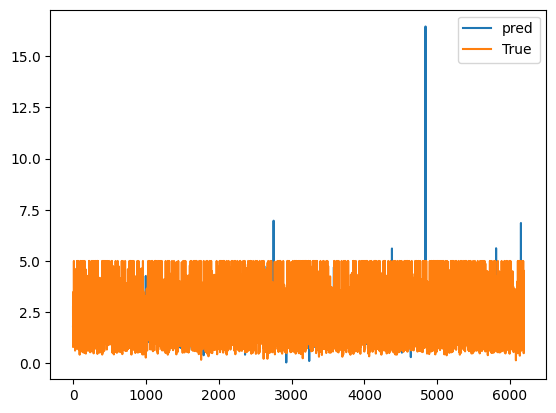

In [106]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fit_train3 = sm.OLS(y_train, X_train)
fit_train3 = fit_train3.fit()

# 예측값
plt.plot(np.array(fit_train3.predict(X_test)), label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [107]:
from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(y_true = y_test, y_pred = fit_train3.predict(X_test))
print(mse3)

1.4965998230186157


In [108]:
print(mse1,'기존 base')
print(mse2,'outlier 제거')
print(mse3,'outlier saving')

1.5147835306070903 기존 base
1.3731187873235062 outlier 제거
1.4965998230186157 outlier saving
